# COVID 19 TIME SERIES (LSTM)


## Dependencies

In [1]:
from TImeSeriesWindow import WindowGenerator as wg

import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

## Load Data


In [2]:
df=pd.read_csv('dataset/cases_malaysia.csv')


## Data Investigation

In [3]:
print(df.shape)

(1457, 31)


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cases_new,1457.0,3613.841455,5954.317880,0.0,182.0,1384.0,3780.0,33406.0
cases_import,1457.0,26.838023,83.126161,0.0,1.0,4.0,10.0,719.0
cases_recovered,1457.0,3577.477008,5905.251973,0.0,160.0,1390.0,3804.0,33872.0
cases_active,1457.0,43642.861359,66137.851106,1.0,10129.0,18280.0,43883.0,323791.0
cases_cluster,1457.0,366.724777,661.009527,0.0,0.0,27.0,447.0,3394.0
cases_unvax,1457.0,1398.457790,2499.087764,0.0,38.0,201.0,1458.0,12681.0
cases_pvax,1457.0,299.695264,1084.673705,0.0,0.0,4.0,27.0,7315.0
cases_fvax,1457.0,967.132464,2083.567121,0.0,0.0,82.0,558.0,13060.0
cases_boost,1457.0,948.555937,2435.958529,0.0,0.0,82.0,840.0,18170.0
cases_child,1457.0,442.281400,827.382406,0.0,11.0,98.0,364.0,4389.0


In [21]:
df.head(25)

,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,cases_child,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
date,,,,,,,,,,,,,,,,,,,,,
2020-01-25,4,4,0,4,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-27,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-28,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-29,3,3,0,7,0,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2020-01-30,1,1,0,8,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-31,0,0,0,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-01,0,0,0,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-02,0,0,0,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     1457 non-null   object 
 1   cases_new                1457 non-null   int64  
 2   cases_import             1457 non-null   int64  
 3   cases_recovered          1457 non-null   int64  
 4   cases_active             1457 non-null   int64  
 5   cases_cluster            1457 non-null   int64  
 6   cases_unvax              1457 non-null   int64  
 7   cases_pvax               1457 non-null   int64  
 8   cases_fvax               1457 non-null   int64  
 9   cases_boost              1457 non-null   int64  
 10  cases_child              1457 non-null   int64  
 11  cases_adolescent         1457 non-null   int64  
 12  cases_adult              1457 non-null   int64  
 13  cases_elderly            1457 non-null   int64  
 14  cases_0_4               

## Data Preprocess

In [7]:
#we do not need date so we pop it out or make it as index since we need the sequence
df.index = pd.to_datetime(df.pop('date'), format='%Y-%m-%d')  

### Data Cleaning

#### Handling null value|

In [8]:
# check null value
df.isna().sum()

cases_new                    0
cases_import                 0
cases_recovered              0
cases_active                 0
cases_cluster                0
cases_unvax                  0
cases_pvax                   0
cases_fvax                   0
cases_boost                  0
cases_child                  0
cases_adolescent             0
cases_adult                  0
cases_elderly                0
cases_0_4                    0
cases_5_11                   0
cases_12_17                  0
cases_18_29                  0
cases_30_39                  0
cases_40_49                  0
cases_50_59                  0
cases_60_69                  0
cases_70_79                  0
cases_80                     0
cluster_import             356
cluster_religious          356
cluster_community          356
cluster_highRisk           356
cluster_education          356
cluster_detentionCentre    356
cluster_workplace          356
dtype: int64

In [9]:
#Select potential value for null and make null to zero
df.replace([" ", "?",""], pd.NA, inplace=True)
df = df.fillna(0).astype('int64')

### Data Spliting

In [10]:
# Train 70% val 20% test 10%
n = len(df)
train_df = df[0:int(n*0.7)]       
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

### Data Normalization

In [11]:
#Standardization
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

## Model Development

### Create window


In [12]:
#Create window from TImeSeriesWindow.py as wg
# this for using the past 30 days of number of cases
window=wg(
    input_width=30,
    label_width=30,
    shift=0,

    train_df=train_df,
    val_df=val_df,
    test_df=test_df,

    label_columns=['cases_new'],
    batch_size=32)



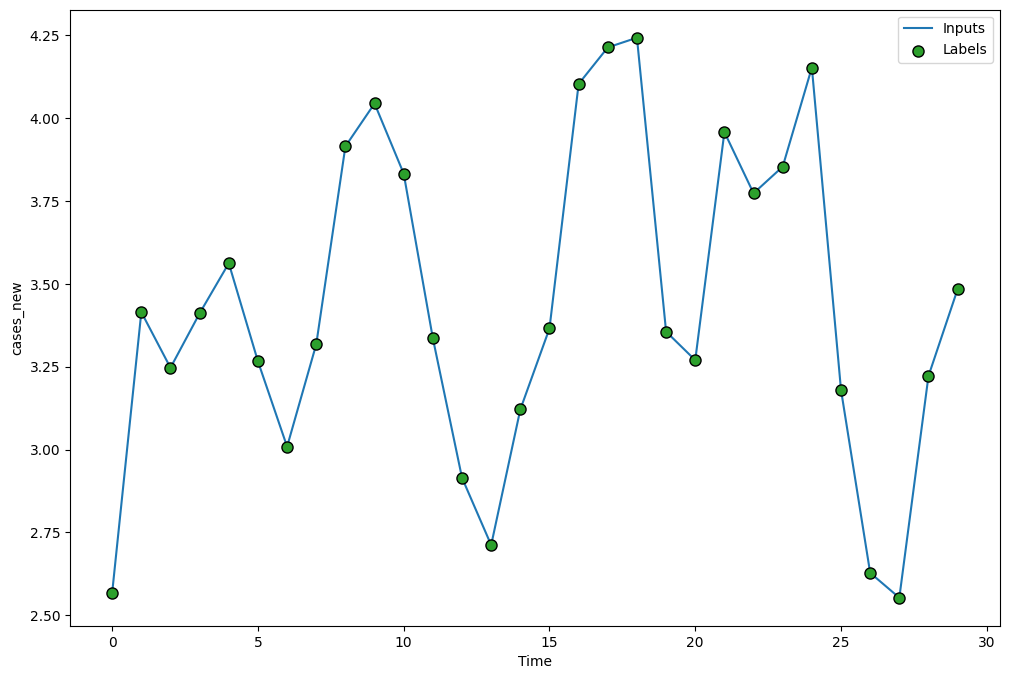

In [13]:
window.plot(plot_col='cases_new')
plt.show()

In [14]:
#Checking the input , shift and label correct define
window

Total window size: 30
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label column name(s): ['cases_new']

### Create LSTM layer

In [15]:
from keras.layers import LSTM,Dense,Dropout

#Create single step layers
model=tf.keras.Sequential([
    # LSTM(64,return_sequences=True),
    # Dropout(0.1),
    LSTM(30,return_sequences=True),
    Dropout(0.1),
    LSTM(30,return_sequences=True),
    Dropout(0.1),
    LSTM(16,return_sequences=True),
    Dropout(0.1),
    LSTM(16,return_sequences=True),
    Dropout(0.1),
    Dense(16),
    Dense(1)
])

### Model compile and training

In [16]:
MAX_EPOCHS = 150
 
#base_log_path=r"tensorboard_logs"
PATH=os.getcwd()
logpath=os.path.join(PATH,'tensorboard_log',datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tb=tf.keras.callbacks.TensorBoard(logpath)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=10,
                                                    mode='min')

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanAbsolutePercentageError()])

history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[tb]
                      )


Epoch 1/150
31/31 [==============================] - 14s 88ms/step - loss: 0.5219 - mean_absolute_percentage_error: 206.0232 - val_loss: 0.1009 - val_mean_absolute_percentage_error: 39.1249
Epoch 2/150
31/31 [==============================] - 1s 32ms/step - loss: 0.2256 - mean_absolute_percentage_error: 138.6020 - val_loss: 0.0678 - val_mean_absolute_percentage_error: 26.6656
Epoch 3/150
31/31 [==============================] - 1s 32ms/step - loss: 0.1401 - mean_absolute_percentage_error: 95.5992 - val_loss: 0.0494 - val_mean_absolute_percentage_error: 23.5972
Epoch 4/150
31/31 [==============================] - 1s 31ms/step - loss: 0.1120 - mean_absolute_percentage_error: 87.8667 - val_loss: 0.0375 - val_mean_absolute_percentage_error: 18.6984
Epoch 5/150
31/31 [==============================] - 1s 33ms/step - loss: 0.0988 - mean_absolute_percentage_error: 88.2710 - val_loss: 0.0323 - val_mean_absolute_percentage_error: 18.3438
Epoch 6/150
31/31 [==============================] - 1s 3

## Model Performance

### Actual and predicted graph

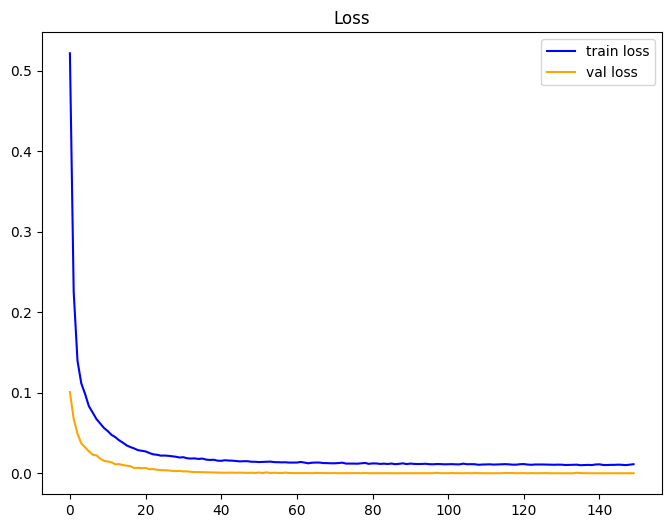

In [17]:

fig=plt.figure()
plt.plot(history.history['loss'],color='blue',label='train loss')
plt.plot(history.history['val_loss'],color='orange',label='val loss')
plt.title('Loss')
plt.legend()
plt.show()

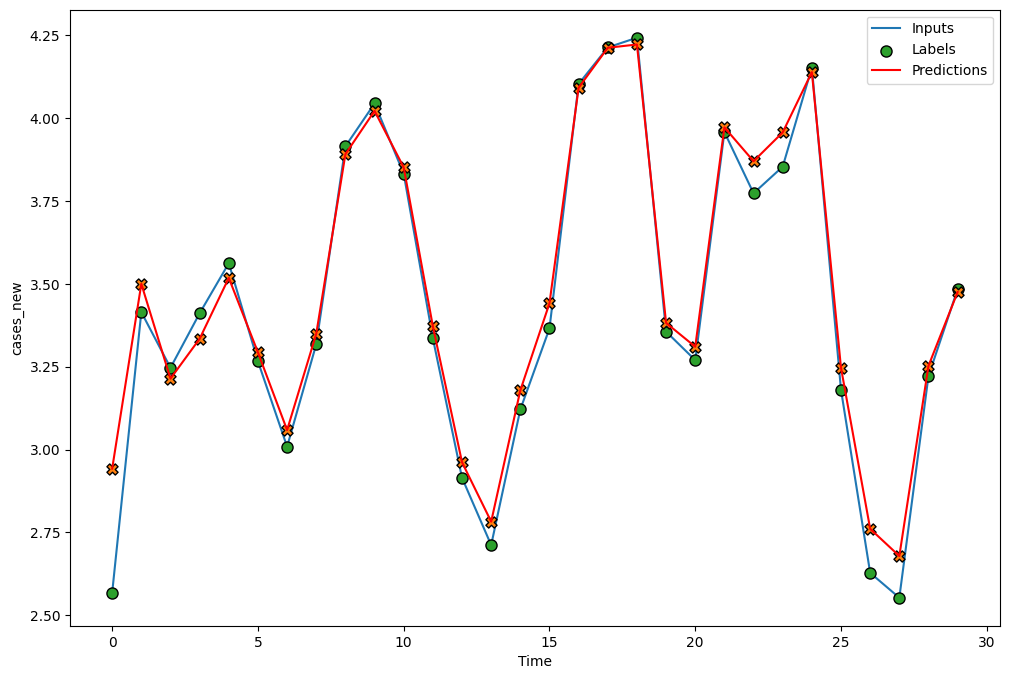

In [18]:
# Predicted and Actual graph
window.plot(plot_col='cases_new',model=model)
plt.show()

### Evaluate on test data

In [ ]:

model.evaluate(window.test)

4/4 [==============================] - 0s 8ms/step - loss: 4.1199e-04 - mean_absolute_percentage_error: 5.9114


[0.00041198995313607156, 5.911403656005859]

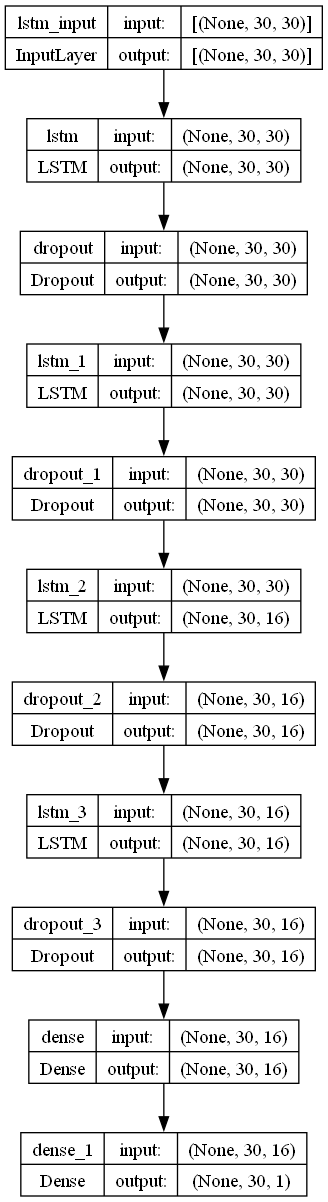

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

## SAVE MODEL

In [22]:
model_save_path = os.path.join(PATH, 'saved_model', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
os.makedirs(model_save_path, exist_ok=True)
model.save(model_save_path)


INFO:tensorflow:Assets written to: c:\Users\VP\Documents\JOBS\Ai SHRDC\EXAM(CAPSTONE)\Accessment 1\saved_model\20240123-174105\assets


INFO:tensorflow:Assets written to: c:\Users\VP\Documents\JOBS\Ai SHRDC\EXAM(CAPSTONE)\Accessment 1\saved_model\20240123-174105\assets
